In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
df=pd.read_csv(r"C:\Users\Mothilal Chowdary\Desktop\DRUGS\DATASET\Drug_Consumption.csv")
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1884 non-null   int64  
 1   Age        1884 non-null   object 
 2   Gender     1884 non-null   object 
 3   Education  1884 non-null   object 
 4   Country    1884 non-null   object 
 5   Ethnicity  1884 non-null   object 
 6   Nscore     1884 non-null   float64
 7   Escore     1884 non-null   float64
 8   Oscore     1884 non-null   float64
 9   AScore     1884 non-null   float64
 10  Cscore     1884 non-null   float64
 11  Impulsive  1884 non-null   float64
 12  SS         1884 non-null   float64
 13  Alcohol    1884 non-null   object 
 14  Amphet     1884 non-null   object 
 15  Amyl       1884 non-null   object 
 16  Benzos     1884 non-null   object 
 17  Caff       1884 non-null   object 
 18  Cannabis   1884 non-null   object 
 19  Choc       1884 non-null   object 
 20  Coke    

In [4]:
df.describe()

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,544.877779,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,2.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.750000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.500000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.250000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [5]:
df.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [6]:
df["VSA"].unique()

array(['CL0', 'CL1', 'CL3', 'CL6', 'CL2', 'CL5', 'CL4'], dtype=object)

In [7]:
df = df.drop(columns=['ID',"Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer"])


In [8]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL0


In [9]:
def drug_encoder(x):
    if x == 'CL0':
        return 0
    elif x == 'CL1':
        return 1
    elif x == 'CL2':
        return 2
    elif x == 'CL3':
        return 3
    elif x == 'CL4':
        return 4
    elif x == 'CL5':
        return 5
    else:
        return 6

In [10]:
df["VSA"] = df["VSA"].apply(drug_encoder)

In [11]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [12]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

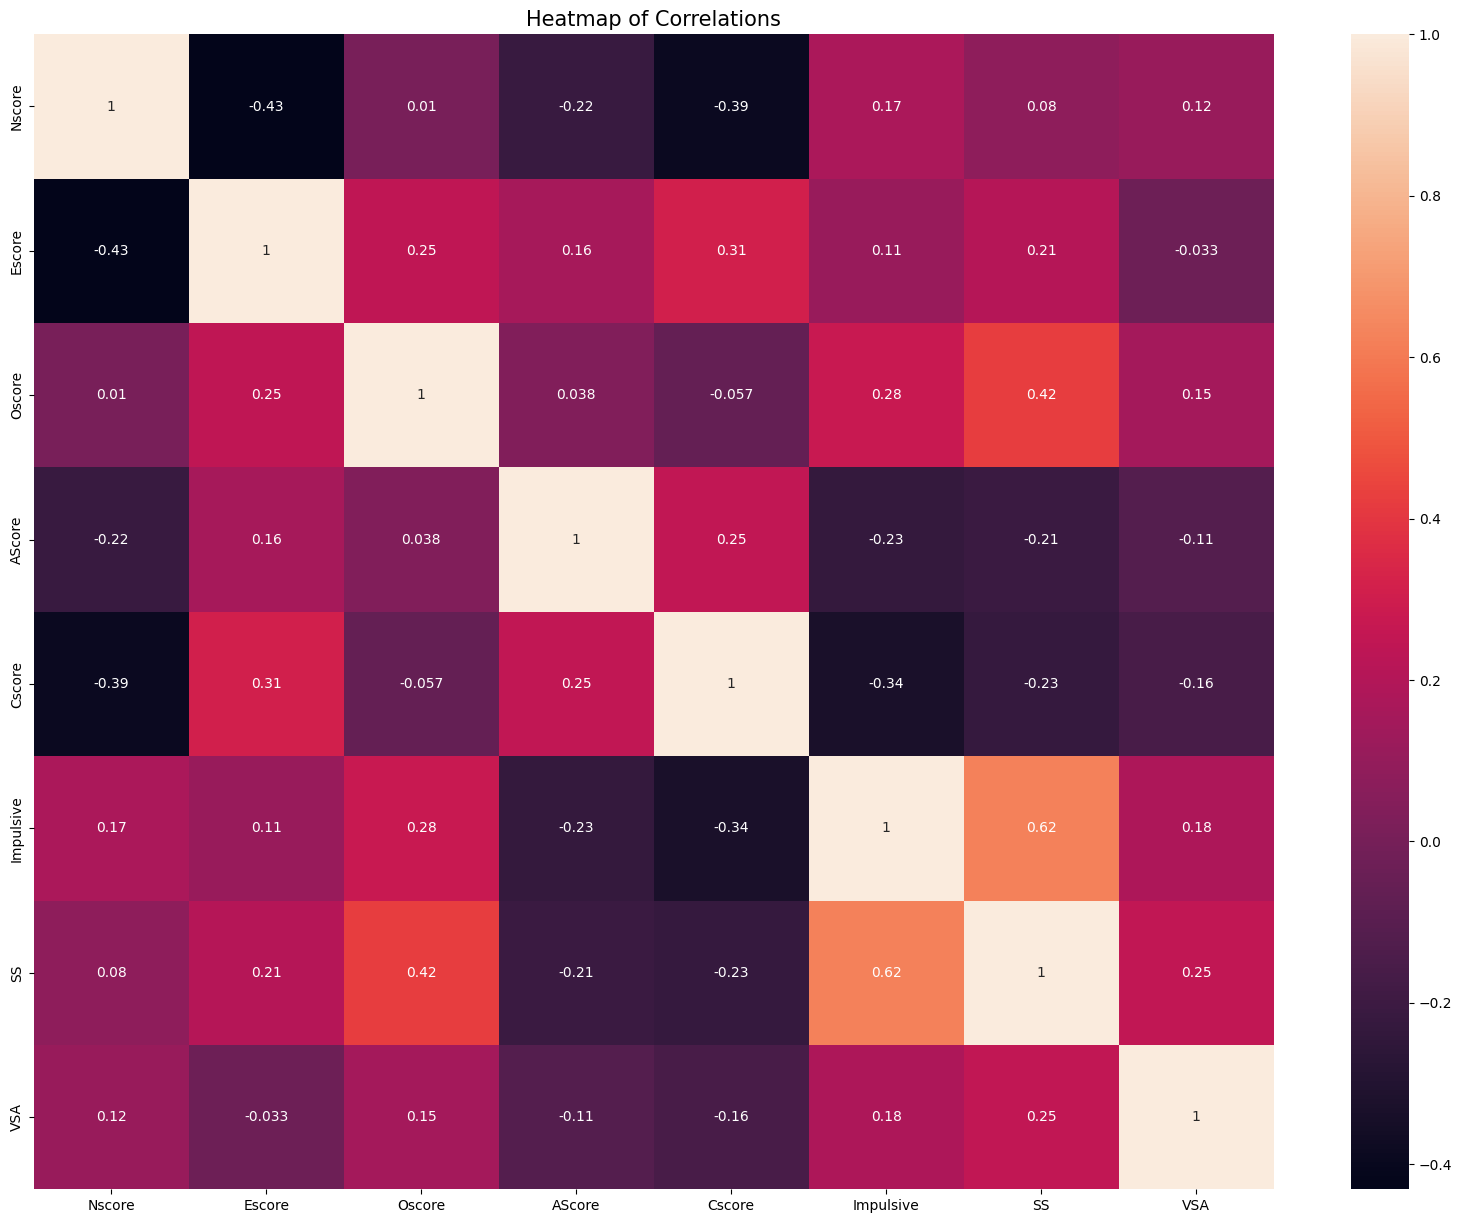

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(numeric_df.corr(),annot=True)
plt.title('Heatmap of Correlations',fontsize=15)
plt.show()

In [14]:
df["Age"].unique()

array(['25-34', '35-44', '18-24', '65+', '45-54', '55-64'], dtype=object)

In [15]:
df["Education"].unique()

array(['Doctorate degree', 'Professional certificate/ diploma',
       'Masters degree', 'Left school at 18 years',
       'Left school at 16 years', 'University degree',
       'Some college or university, no certificate or degree',
       'Left school before 16 years', 'Left school at 17 years'],
      dtype=object)

In [16]:
df["Country"].unique()

array(['UK', 'Canada', 'USA', 'Other', 'Australia', 'Republic of Ireland',
       'New Zealand'], dtype=object)

In [17]:
df["Ethnicity"].unique()

array(['White', 'Other', 'Mixed-White/Black', 'Asian',
       'Mixed-White/Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

In [18]:
def age_encoder(x):
    if x == '18-24':
        return "young"
    elif x == '25-34':
        return "middle young"
    elif x == '35-44':
        return "early middle"
    elif x == '45-54':
        return "middle age"
    elif x == '55-64':
        return "adults"
    else:
        return "old adults"

In [19]:
df["Age"] = df["Age"].apply(age_encoder)

In [52]:
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [54]:
label_mapping = {label: idx for idx, label in enumerate(le.classes_)}
print(label_mapping)

{np.int64(0): 0, np.int64(1): 1, np.int64(2): 2, np.int64(3): 3, np.int64(4): 4, np.int64(5): 5}


In [21]:
df["Age"].value_counts()

Age
young           643
middle young    481
early middle    355
middle age      294
adults           93
old adults       18
Name: count, dtype: int64

In [22]:
df["Gender"].value_counts()

Gender
M    943
F    941
Name: count, dtype: int64

In [23]:
df["Education"].value_counts()

Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64

In [24]:
df["Country"].value_counts()

Country
UK                     1043
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: count, dtype: int64

In [25]:
df["Ethnicity"].value_counts()

Ethnicity
White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Black      20
Mixed-White/Asian      19
Mixed-Black/Asian       3
Name: count, dtype: int64

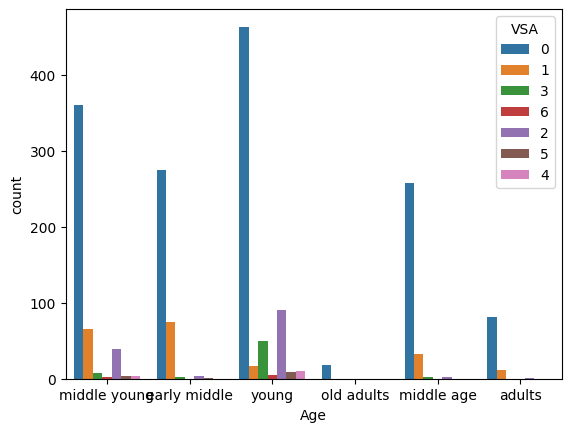

In [26]:
sns.countplot(x=df["Age"], hue=df['VSA'].astype(str))
plt.show()

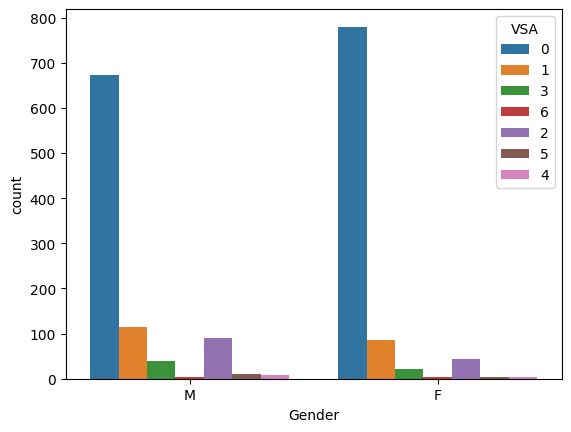

In [27]:
sns.countplot(x=df["Gender"], hue=df['VSA'].astype(str))
plt.show()

In [28]:
df.columns.to_list()

['Age',
 'Gender',
 'Education',
 'Country',
 'Ethnicity',
 'Nscore',
 'Escore',
 'Oscore',
 'AScore',
 'Cscore',
 'Impulsive',
 'SS',
 'VSA']

In [29]:
df.isnull().sum()

Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
VSA          0
dtype: int64

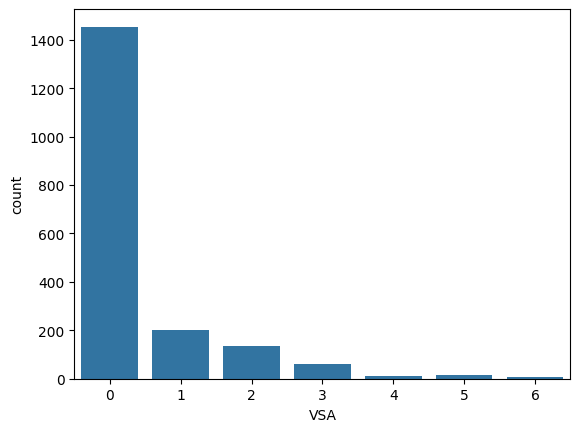

In [30]:
sns.countplot(x=df["VSA"])
plt.show()

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [51]:
df['Age']=le.fit_transform(df['Age'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [34]:
df['Gender']=le.fit_transform(df['Gender'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,1,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,1,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,0,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,0,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,0,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,0,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,1,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,0,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,0,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [35]:
df['Education']=le.fit_transform(df['Education'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,1,0,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,1,6,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,0,5,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,0,0,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,0,3,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,0,7,USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,1,7,USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,0,8,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,0,7,USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [36]:
df['Country']=le.fit_transform(df['Country'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,1,0,5,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,1,6,5,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,0,5,5,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,0,0,5,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,0,3,1,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,0,7,6,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,1,7,6,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,0,8,6,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,0,7,6,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [37]:
df['Ethnicity']=le.fit_transform(df['Ethnicity'])
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
0,3,1,0,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0
1,1,1,6,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,5,0,5,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,1,0,0,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,4,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,5,0,7,6,6,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1880,5,1,7,6,6,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0
1881,3,0,8,6,6,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1882,5,0,7,6,6,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


In [38]:
df["VSA"].value_counts()

VSA
0    1454
1     200
2     135
3      61
5      14
4      13
6       7
Name: count, dtype: int64

In [39]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df['VSA']== 0]
df_minority = df[df['VSA']== 6]
df_minority1 = df[df['VSA']== 4]
df_minority2 = df[df['VSA']== 5]
df_minority3 = df[df['VSA']== 3]
df_minority4 = df[df['VSA']== 2]
df_minority5 = df[df['VSA']== 1]
 
# Downsample majority class and upsample the minority class
df_minority_upsampled = resample(df_minority, replace=True,n_samples=500,random_state=100)
df_minority1_upsampled = resample(df_minority1, replace=True,n_samples=500,random_state=100) 
df_minority2_upsampled = resample(df_minority2, replace=True,n_samples=500,random_state=100)
df_minority3_upsampled = resample(df_minority3, replace=True,n_samples=500,random_state=100) 
df_minority4_upsampled = resample(df_minority4, replace=True,n_samples=500,random_state=100) 
df_minority5_upsampled = resample(df_minority5, replace=True,n_samples=500,random_state=100) 
df_majority_downsampled = resample(df_majority, replace=False,n_samples=500,random_state=100) 
 
# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_minority_upsampled,df_minority1_upsampled,df_minority2_upsampled,df_minority3_upsampled,df_minority4_upsampled,df_minority5_upsampled,df_majority_downsampled])
 
# Display new class counts
df_balanced['VSA'].value_counts()

VSA
6    500
4    500
5    500
3    500
2    500
1    500
0    500
Name: count, dtype: int64

C:\Users\Mothilal Chowdary\AppData\Local\Temp\ipykernel_2844\3464160494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="VSA", data=df_balanced, palette=sns.color_palette("cubehelix", 4))
C:\Users\Mothilal Chowdary\AppData\Local\Temp\ipykernel_2844\3464160494.py:3: UserWarning: 
The palette list has fewer values (4) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(x="VSA", data=df_balanced, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class')

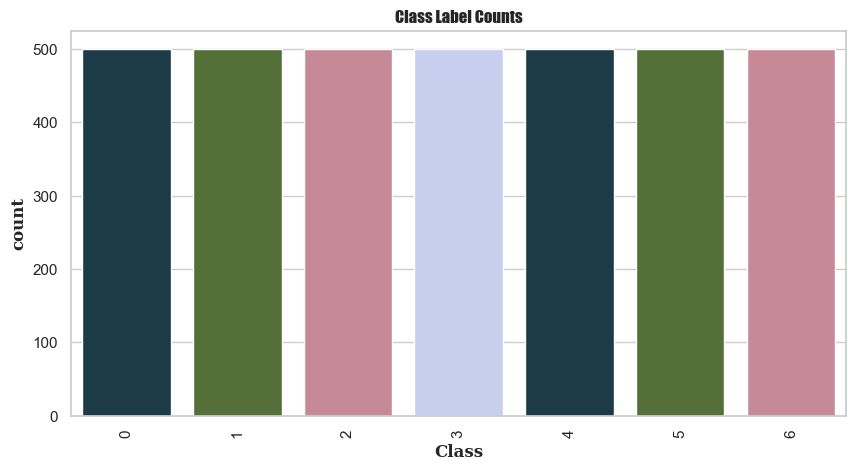

In [40]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="VSA", data=df_balanced, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class", {"fontname": "serif", "fontweight":"bold"}) 

In [41]:
df=df_balanced
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,VSA
182,5,0,8,5,6,1.98437,-0.43999,0.29338,-0.76096,0.93949,-0.71126,0.40148,6
182,5,0,8,5,6,1.98437,-0.43999,0.29338,-0.76096,0.93949,-0.71126,0.40148,6
1351,5,1,8,6,6,-0.14882,0.32197,0.58331,0.94156,-0.00665,1.29221,0.76540,6
182,5,0,8,5,6,1.98437,-0.43999,0.29338,-0.76096,0.93949,-0.71126,0.40148,6
1129,3,1,5,2,6,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,0,6,5,6,1.49158,-1.23177,-1.55521,-2.07848,-0.78155,0.52975,0.07987,0
1581,3,0,8,5,6,0.13606,1.11406,0.14143,-0.15487,0.58489,0.88113,0.40148,0
1156,3,0,8,1,6,0.62967,-0.15487,0.14143,-0.01729,-1.13788,0.19268,1.22470,0
651,1,0,1,5,6,-0.34799,0.96248,-0.71727,0.43852,1.13407,-0.71126,-0.84637,0


In [42]:
x = df.drop(columns=['VSA'])
y = df['VSA']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [44]:
pd.DataFrame(x_test).to_csv(r"C:\Users\Mothilal Chowdary\Desktop\DRUGS\BACKEND\test.csv")

In [45]:
x_train.shape

(2450, 12)

In [46]:
x_test.shape

(1050, 12)

# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]

param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=5)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_max_depth = model.best_estimator_.max_depth
optimal_n_estimators = model.best_estimator_.n_estimators

optimal n_estimators 20
optimal max_depth 100


AUC on Test data is 0.9295238095238095
AUC on Train data is 1.0
---------------------------


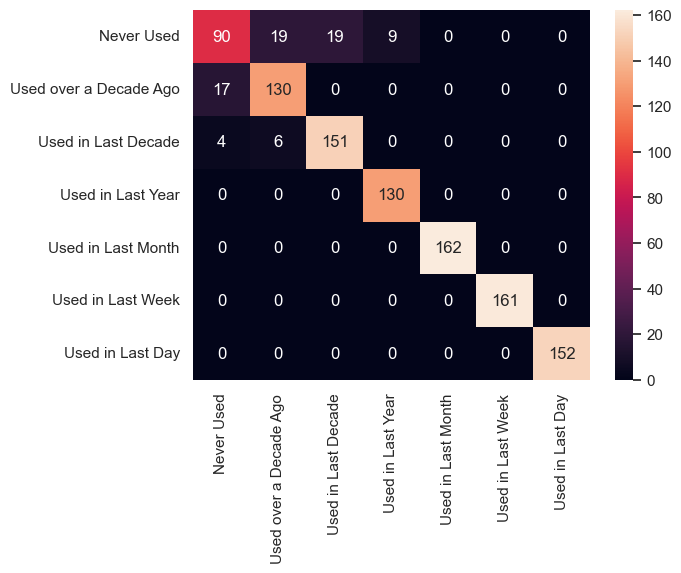

In [48]:
from sklearn.metrics import accuracy_score
#training our model for max_depth=500,n_estimators = 60
clf = RandomForestClassifier(max_depth = optimal_max_depth,n_estimators = optimal_n_estimators)
clf.fit(x_train,y_train)

import pickle
filename = r"C:\Users\Mothilal Chowdary\Desktop\DRUGS\BACKEND\rf_drug.pkl"
pickle.dump(clf, open(filename, 'wb'))


pred_test3 =clf.predict(x_test)
test_accuracy3 = accuracy_score(y_test, pred_test3)
pred_train = clf.predict(x_train)
train_accuracy3 =accuracy_score(y_train,pred_train)

print("AUC on Test data is " +str(accuracy_score(y_test,pred_test3)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")

# Code for drawing seaborn heatmaps
class_names =['Never Used','Used over a Decade Ago','Used in Last Decade','Used in Last Year','Used in Last Month','Used in Last Week','Used in Last Day']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test3.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

## XgBoost

AUC on Test data is 0.939047619047619
AUC on Train data is 1.0
---------------------------


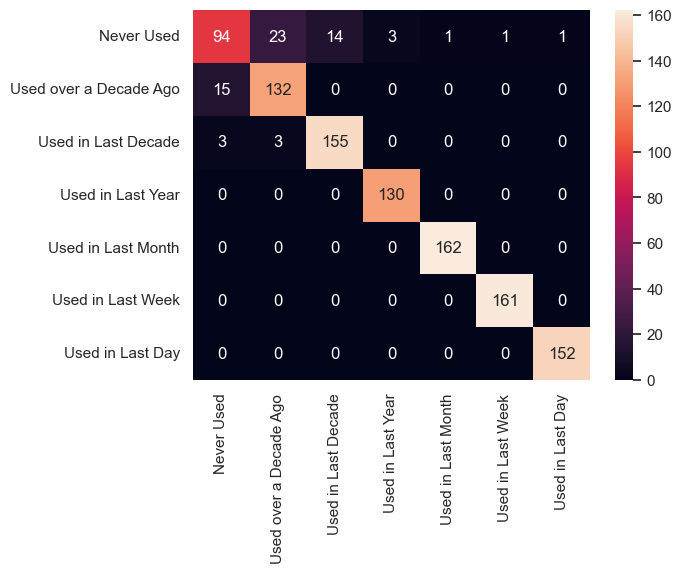

In [49]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.04,random_state=1)
model.fit(x_train, y_train)

import pickle
filename = r'C:\Users\Mothilal Chowdary\Desktop\DRUGS\BACKEND\X_gb_drug.pkl'
pickle.dump(model, open(filename, 'wb'))


pred_test4 =model.predict(x_test)
test_accuracy4 = accuracy_score(y_test, pred_test4)
pred_train = model.predict(x_train)
train_accuracy4 =accuracy_score(y_train,pred_train)


print("AUC on Test data is " +str(accuracy_score(y_test,pred_test4)))
print("AUC on Train data is " +str(accuracy_score(y_train,pred_train)))

print("---------------------------")
# Code for drawing seaborn heatmaps
class_names =['Never Used','Used over a Decade Ago','Used in Last Decade','Used in Last Year','Used in Last Month','Used in Last Week','Used in Last Day']
df_heatmap = pd.DataFrame(confusion_matrix(y_test, pred_test4.round()), index=class_names, columns=class_names )
fig = plt.figure( )
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")